# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline 

In [25]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage='single')), 
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage='complete')),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage='average'))]

# linkage{“ward”, “complete”, “average”, “single”}, default=”ward”
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
The algorithm will merge the pairs of cluster that minimize this criterion.

- ward minimizes the variance of the clusters being merged.
- average uses the average of the distances of each observation of the two sets.
- complete or maximum linkage uses the maximum distances between all observations of the two sets.
- single uses the minimum of the distances between all observations of the two sets.

In [23]:
""""
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=None, linkage='ward')), 
              ('hc_complete', AgglomerativeClustering(n_clusters=None, linkage='complete')),
              ('hc_average', AgglomerativeClustering(n_clusters=None, linkage='average'))]
"""""

'"\nestimators = [(\'hc_ward\', AgglomerativeClustering(n_clusters=None, linkage=\'ward\')), \n              (\'hc_complete\', AgglomerativeClustering(n_clusters=None, linkage=\'complete\')),\n              (\'hc_average\', AgglomerativeClustering(n_clusters=None, linkage=\'average\'))]\n'

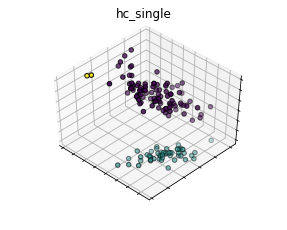

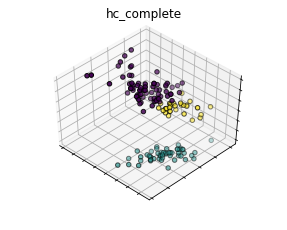

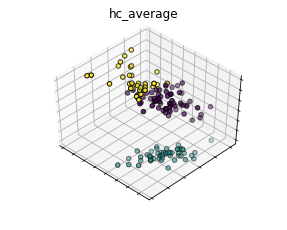

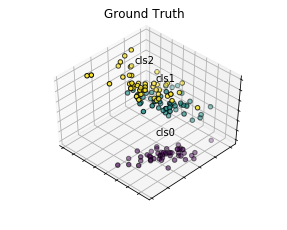

In [26]:
fignum = 1
titles = ['hc_single', 'hc_complete', 'hc_average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Ground Truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
#y = np.choose(y, [0, 1, 2]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12